In [1]:
import time
import re
import pylab as pl
import numpy as np
import pylab as pl

from datetime import datetime, timedelta

import subprocess

import os
import pandas as pd



from joblib import Parallel, delayed
import shutil


from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor

In [2]:
# time.sleep(120)

In [3]:
def str2datetime(s):
    parts = s.split('.')
    dt = datetime.strptime(parts[0], "%Y-%m-%d %H:%M:%S")
    return dt.replace(microsecond=int(parts[1]))


def remove_outliers(x, outlierConstant = 1.5):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    removedList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
        else:
            removedList.append(y)
    return (resultList, removedList)
def getThroughput(experiment):

    result = subprocess.check_output('cat '+experiment+'/nohup_client_*', shell=True)


    result = result.decode("utf-8") 

    lines = result.split('\n')

    commit_pat = re.compile('([^[].*) \[hotstuff info\] ([0-9.]*)$')
#     commit_pat = re.compile('([^[].*) \[hotstuff info\] got*')

    Times = []
    lats = []

    for line in lines:
        m = commit_pat.match(line)
        if m:
            try:

                time_item = float((line.split(' ')[1]).split(':')[0])*3600 + float((line.split(' ')[1]).split(':')[1])*60 + \
                float((line.split(' ')[1]).split(':')[2])
                Times.append(time_item)        

                lats.append(float(m.group(2)))
            except:
                continue


    begin_time = None
    values = []
    interval = 1
    cnt = 0
    Times.sort()
    for timestamp in Times:
        if begin_time is None:
            begin_time = timestamp
            next_begin_time = timestamp +interval

        while timestamp >= next_begin_time:
            begin_time = next_begin_time
            next_begin_time += interval
            values.append(cnt)
            cnt = 0
        cnt += 1
    values.append(cnt)
    
#     lats, _ = remove_outliers(lats)
#     print(len(values))


    return np.arange(len(values))*interval,np.array(values)/interval, lats

In [4]:
# p = subprocess.Popen(['../../hotstuff-keygen', ' --num', '--n', str(4)],
#                      stdout=subprocess.PIPE, stderr=open(os.devnull, 'w'))

In [5]:
# print([[t[4:] for t in l.decode('ascii').split()] for l in p.stdout])
# # [[t for t in l.decode('ascii').split()] for l in p.stdout.read()]

In [6]:
# os.system('echo 3108 | sudo -S sh job_mini.sh '+ 'test')


In [7]:
# regions= ['us-west-1', 'ap-south-1']
# regions= ['ap-south-1', 'eu-central-1', 'us-west-2']
# regions= ['ap-south-1', 'eu-central-1']
regions= ['ap-south-1']


instance_type = 't2.small'

In [8]:
# df

In [9]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 1, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 1, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 1, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 1, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 2, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 2, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 2, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 2, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 3, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 3, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 3, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 3, 'FKA.pem', -1, 15,
# 16, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 17, 'ap-south-1', 1, -1, 'FKA.pem', 1, -1,
# 18, 'ap-south-1', 1, -1, 'FKA.pem', 2, -1,
# 19, 'ap-south-1', 1, -1, 'FKA.pem', 3, -1,
# 20, 'eu-central-1', 0, 4, 'FKE.pem', -1, 16,
# 21, 'eu-central-1', 0, 4, 'FKE.pem', -1, 17,
# 22, 'eu-central-1', 0, 4, 'FKE.pem', -1, 18,
# 23, 'eu-central-1', 0, 4, 'FKE.pem', -1, 19,
# 24, 'eu-central-1', 0, 5, 'FKE.pem', -1, 20,
# 25, 'eu-central-1', 0, 5, 'FKE.pem', -1, 21,
# 26, 'eu-central-1', 0, 5, 'FKE.pem', -1, 22,
# 27, 'eu-central-1', 0, 5, 'FKE.pem', -1, 23,
# 28, 'eu-central-1', 0, 6, 'FKE.pem', -1, 24,
# 29, 'eu-central-1', 0, 6, 'FKE.pem', -1, 25,
# 30, 'eu-central-1', 0, 6, 'FKE.pem', -1, 26,
# 31, 'eu-central-1', 0, 6, 'FKE.pem', -1, 27,
# 32, 'eu-central-1', 0, 7, 'FKE.pem', -1, 28,
# 33, 'eu-central-1', 0, 7, 'FKE.pem', -1, 29,
# 34, 'eu-central-1', 0, 7, 'FKE.pem', -1, 30,
# 35, 'eu-central-1', 0, 7, 'FKE.pem', -1, 31,
# 36, 'eu-central-1', 1, -1, 'FKE.pem', 4, -1,
# 37, 'eu-central-1', 1, -1, 'FKE.pem', 5, -1,
# 38, 'eu-central-1', 1, -1, 'FKE.pem', 6, -1,
# 39, 'eu-central-1', 1, -1, 'FKE.pem', 7, -1,
# 40, 'us-west-2', 0, 8, 'FKU2.pem', -1, 32,
# 41, 'us-west-2', 0, 8, 'FKU2.pem', -1, 33,
# 42, 'us-west-2', 0, 8, 'FKU2.pem', -1, 34,
# 43, 'us-west-2', 0, 8, 'FKU2.pem', -1, 35,
# 44, 'us-west-2', 0, 9, 'FKU2.pem', -1, 36,
# 45, 'us-west-2', 0, 9, 'FKU2.pem', -1, 37,
# 46, 'us-west-2', 0, 9, 'FKU2.pem', -1, 38,
# 47, 'us-west-2', 0, 9, 'FKU2.pem', -1, 39,
# 48, 'us-west-2', 0, 10, 'FKU2.pem', -1, 40,
# 49, 'us-west-2', 0, 10, 'FKU2.pem', -1, 41,
# 50, 'us-west-2', 0, 10, 'FKU2.pem', -1, 42,
# 51, 'us-west-2', 0, 10, 'FKU2.pem', -1, 43,
# 52, 'us-west-2', 0, 11, 'FKU2.pem', -1, 44,
# 53, 'us-west-2', 0, 11, 'FKU2.pem', -1, 45,
# 54, 'us-west-2', 0, 11, 'FKU2.pem', -1, 46,
# 55, 'us-west-2', 0, 11, 'FKU2.pem', -1, 47,
# 56, 'us-west-2', 1, -1, 'FKU2.pem', 8, -1,
# 57, 'us-west-2', 1, -1, 'FKU2.pem', 9, -1,
# 58, 'us-west-2', 1, -1, 'FKU2.pem', 10, -1,
# 59, 'us-west-2', 1, -1, 'FKU2.pem', 11, -1,

In [10]:
%%file node_info.csv
node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
8, 'ap-south-1', 0, 0, 'FKA.pem', -1, 8,
9, 'ap-south-1', 0, 0, 'FKA.pem', -1, 9,
10, 'ap-south-1', 0, 1, 'FKA.pem', -1, 10,
11, 'ap-south-1', 0, 1, 'FKA.pem', -1, 11,
12, 'ap-south-1', 0, 1, 'FKA.pem', -1, 12,
13, 'ap-south-1', 0, 1, 'FKA.pem', -1, 13,
14, 'ap-south-1', 0, 1, 'FKA.pem', -1, 14,
15, 'ap-south-1', 0, 1, 'FKA.pem', -1, 15,
16, 'ap-south-1', 0, 1, 'FKA.pem', -1, 16,
17, 'ap-south-1', 0, 1, 'FKA.pem', -1, 17,
18, 'ap-south-1', 0, 1, 'FKA.pem', -1, 18,
19, 'ap-south-1', 0, 1, 'FKA.pem', -1, 19,
20, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
21, 'ap-south-1', 1, -1, 'FKA.pem', 1, -1,



Overwriting node_info.csv


In [11]:
df =pd.read_csv('node_info.csv')

In [12]:
node_info_dict = df.to_dict()

In [13]:
node_info_dict

{'node_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21},
 'region': {0: " 'ap-south-1'",
  1: " 'ap-south-1'",
  2: " 'ap-south-1'",
  3: " 'ap-south-1'",
  4: " 'ap-south-1'",
  5: " 'ap-south-1'",
  6: " 'ap-south-1'",
  7: " 'ap-south-1'",
  8: " 'ap-south-1'",
  9: " 'ap-south-1'",
  10: " 'ap-south-1'",
  11: " 'ap-south-1'",
  12: " 'ap-south-1'",
  13: " 'ap-south-1'",
  14: " 'ap-south-1'",
  15: " 'ap-south-1'",
  16: " 'ap-south-1'",
  17: " 'ap-south-1'",
  18: " 'ap-south-1'",
  19: " 'ap-south-1'",
  20: " 'ap-south-1'",
  21: " 'ap-south-1'"},
 'ServerOrClientregion': {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 0,
  15: 0,
  16: 0,
  17: 0,
  18: 0,
  19: 0,
  20: 1,
  21: 1},
 'cluster_id': {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0

In [14]:

instance_type2 = 'c4.4xlarge'
redirect2 = '>>'

for index, region  in enumerate(regions):
    
    print(index, region)
    redirect = '>>'
    if index==0:
        redirect = '>'
        
    os.system("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
              instance_type+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
              redirect+" all_internal_ips")
    
    
    print("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
              instance_type+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
              redirect+" all_internal_ips")


    os.system("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
          instance_type+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
          redirect+" all_external_ips")
    
    
    print("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
          instance_type+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
          redirect+" all_external_ips")
    
    

#     os.system("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
#           instance_type2+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
#           redirect2+" all_internal_ips")



#     os.system("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
#           instance_type2+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
#           redirect2+" all_external_ips")
    
    
    
    
    

0 ap-south-1
aws --region ap-south-1 ec2 describe-instances  --filter Name=instance-type,Values=t2.small --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text > all_internal_ips
aws --region ap-south-1 ec2 describe-instances  --filter Name=instance-type,Values=t2.small --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text > all_external_ips


In [15]:
!cat all_internal_ips
! echo " " 
# !cat all_external_ips

52.66.202.63
43.205.191.197
13.233.13.38
65.2.172.71
52.66.147.29
13.232.235.50
13.127.147.18
13.233.89.91
35.154.81.36
13.127.45.146
13.235.13.31
52.66.214.16
52.66.210.219
15.206.74.49
65.0.86.139
3.110.225.136
43.205.230.207
13.234.231.254
3.110.184.102
13.233.88.199
13.232.249.50
13.126.17.77
 


In [16]:
f = open('all_external_ips', "r")
data1 = [line.strip() for line in f.readlines()]

data1 = [x for x in data1 if x!='None']

In [17]:
f = open('all_internal_ips', "r")
data2 = [line.strip() for line in f.readlines()]

data2 = [x for x in data2 if x!='None']

In [18]:
data2, len(data2)

(['52.66.202.63',
  '43.205.191.197',
  '13.233.13.38',
  '65.2.172.71',
  '52.66.147.29',
  '13.232.235.50',
  '13.127.147.18',
  '13.233.89.91',
  '35.154.81.36',
  '13.127.45.146',
  '13.235.13.31',
  '52.66.214.16',
  '52.66.210.219',
  '15.206.74.49',
  '65.0.86.139',
  '3.110.225.136',
  '43.205.230.207',
  '13.234.231.254',
  '3.110.184.102',
  '13.233.88.199',
  '13.232.249.50',
  '13.126.17.77'],
 22)

In [19]:
data = []

In [20]:
# for i in range(len(data1)):
#     if data1[i]!='None':
# #         data.append(data1[i] + '    ' + data2[i])
#         data.append('127.0.0.1'+ '    ' + '127.0.0.1')
    

skip_instances = 0
    
for i in range(skip_instances, len(data1)):
    if data1[i]!='None':
        data.append(data1[i] + '    ' + data2[i])
#         data.append('127.0.0.1'+ '    ' + '127.0.0.1')

In [21]:
data, len(data)

(['52.66.202.63    52.66.202.63',
  '43.205.191.197    43.205.191.197',
  '13.233.13.38    13.233.13.38',
  '65.2.172.71    65.2.172.71',
  '52.66.147.29    52.66.147.29',
  '13.232.235.50    13.232.235.50',
  '13.127.147.18    13.127.147.18',
  '13.233.89.91    13.233.89.91',
  '35.154.81.36    35.154.81.36',
  '13.127.45.146    13.127.45.146',
  '13.235.13.31    13.235.13.31',
  '52.66.214.16    52.66.214.16',
  '52.66.210.219    52.66.210.219',
  '15.206.74.49    15.206.74.49',
  '65.0.86.139    65.0.86.139',
  '3.110.225.136    3.110.225.136',
  '43.205.230.207    43.205.230.207',
  '13.234.231.254    13.234.231.254',
  '3.110.184.102    3.110.184.102',
  '13.233.88.199    13.233.88.199',
  '13.232.249.50    13.232.249.50',
  '13.126.17.77    13.126.17.77'],
 22)

In [22]:
for index, item in enumerate(data1):
    if 'publicIP' not in node_info_dict.keys():
        node_info_dict['publicIP'] = {}

        
    node_info_dict['publicIP'][index] = item 
    
    
for index, item in enumerate(data2):
    if 'privateIP' not in node_info_dict.keys():
        node_info_dict['privateIP'] = {}
        
    node_info_dict['privateIP'][index] = item 
    
    
    
for index, item in enumerate(data):
    if 'publicAndprivateIP' not in node_info_dict.keys():
        node_info_dict['publicAndprivateIP'] = {}
        
    node_info_dict['publicAndprivateIP'][index] = item 

In [23]:
node_info_dict

{'node_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21},
 'region': {0: " 'ap-south-1'",
  1: " 'ap-south-1'",
  2: " 'ap-south-1'",
  3: " 'ap-south-1'",
  4: " 'ap-south-1'",
  5: " 'ap-south-1'",
  6: " 'ap-south-1'",
  7: " 'ap-south-1'",
  8: " 'ap-south-1'",
  9: " 'ap-south-1'",
  10: " 'ap-south-1'",
  11: " 'ap-south-1'",
  12: " 'ap-south-1'",
  13: " 'ap-south-1'",
  14: " 'ap-south-1'",
  15: " 'ap-south-1'",
  16: " 'ap-south-1'",
  17: " 'ap-south-1'",
  18: " 'ap-south-1'",
  19: " 'ap-south-1'",
  20: " 'ap-south-1'",
  21: " 'ap-south-1'"},
 'ServerOrClientregion': {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 0,
  15: 0,
  16: 0,
  17: 0,
  18: 0,
  19: 0,
  20: 1,
  21: 1},
 'cluster_id': {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0

In [24]:
for item in node_info_dict['publicAndprivateIP']:
    print(node_info_dict['publicAndprivateIP'][item])

52.66.202.63    52.66.202.63
43.205.191.197    43.205.191.197
13.233.13.38    13.233.13.38
65.2.172.71    65.2.172.71
52.66.147.29    52.66.147.29
13.232.235.50    13.232.235.50
13.127.147.18    13.127.147.18
13.233.89.91    13.233.89.91
35.154.81.36    35.154.81.36
13.127.45.146    13.127.45.146
13.235.13.31    13.235.13.31
52.66.214.16    52.66.214.16
52.66.210.219    52.66.210.219
15.206.74.49    15.206.74.49
65.0.86.139    65.0.86.139
3.110.225.136    3.110.225.136
43.205.230.207    43.205.230.207
13.234.231.254    13.234.231.254
3.110.184.102    3.110.184.102
13.233.88.199    13.233.88.199
13.232.249.50    13.232.249.50
13.126.17.77    13.126.17.77


In [25]:
with open('replicas.txt', 'w') as f:
    
    for item in node_info_dict['publicAndprivateIP']:
        
        if (node_info_dict['ServerOrClientregion'][item] ==0):
            f.write("%s\n" % node_info_dict['publicAndprivateIP'][item])
    

In [26]:
node_info_dict['ServerOrClientregion']

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 1,
 21: 1}

In [27]:
! cat replicas.txt

52.66.202.63    52.66.202.63
43.205.191.197    43.205.191.197
13.233.13.38    13.233.13.38
65.2.172.71    65.2.172.71
52.66.147.29    52.66.147.29
13.232.235.50    13.232.235.50
13.127.147.18    13.127.147.18
13.233.89.91    13.233.89.91
35.154.81.36    35.154.81.36
13.127.45.146    13.127.45.146
13.235.13.31    13.235.13.31
52.66.214.16    52.66.214.16
52.66.210.219    52.66.210.219
15.206.74.49    15.206.74.49
65.0.86.139    65.0.86.139
3.110.225.136    3.110.225.136
43.205.230.207    43.205.230.207
13.234.231.254    13.234.231.254
3.110.184.102    3.110.184.102
13.233.88.199    13.233.88.199


In [28]:
with open('clients.txt', 'w') as f:
    
    for item in node_info_dict['publicIP']:
        
        if (node_info_dict['ServerOrClientregion'][item] ==1):
            f.write("%s\n" % node_info_dict['publicIP'][item])

In [29]:
os.system('cat clients.txt')

13.232.249.50
13.126.17.77


0

In [30]:
node_info_dict

{'node_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21},
 'region': {0: " 'ap-south-1'",
  1: " 'ap-south-1'",
  2: " 'ap-south-1'",
  3: " 'ap-south-1'",
  4: " 'ap-south-1'",
  5: " 'ap-south-1'",
  6: " 'ap-south-1'",
  7: " 'ap-south-1'",
  8: " 'ap-south-1'",
  9: " 'ap-south-1'",
  10: " 'ap-south-1'",
  11: " 'ap-south-1'",
  12: " 'ap-south-1'",
  13: " 'ap-south-1'",
  14: " 'ap-south-1'",
  15: " 'ap-south-1'",
  16: " 'ap-south-1'",
  17: " 'ap-south-1'",
  18: " 'ap-south-1'",
  19: " 'ap-south-1'",
  20: " 'ap-south-1'",
  21: " 'ap-south-1'"},
 'ServerOrClientregion': {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 0,
  15: 0,
  16: 0,
  17: 0,
  18: 0,
  19: 0,
  20: 1,
  21: 1},
 'cluster_id': {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0

In [31]:
# def run_server_node_remote(i):
#     ip = lines[i]
# #     if ip!='None' and( ip in nodeIps[:-3]):
#     if ip!='None' and( ip in nodeIps):
        
        
#         current = (ip.split('.'))
#         command = './examples/hotstuff-app --conf hotstuff.gen-sec'+str(nodeIps.index(ip))+'.conf '
        
#         print(i,command)
        
        
        
# for i in range(len(lines)):
#     print(i)
#     run_server_node_remote(i)
    
    

        
# def run_client_node_remote(i):
#     ip = lines[i]
#     if ip!='None' and( ip in clientIps):
        
#         current = (ip.split('.'))
#         command = './examples/hotstuff-client --idx 0 --iter -1 --max-async 5 >../nohup.out 2>&1 &"'
        
#         print(command)

# for i in range(len(lines)):
#     print(i)
#     run_client_node_remote(i)


In [32]:
# # # os.system('echo 3108 | sudo -S ls')/FinalKeys.pem

# # experiment = 'exp_f1'

# # os.system('echo 3108 | sudo -S sh job_mini1.sh '+experiment)

# # os.system('./run_cli.sh new '+experiment+'_cli;')
# # os.system('sleep 30;')
# # kill_nodes(3)

# # # run_server_node(3)

# # os.system('sleep 30;')

# # os.system('./run_cli.sh stop '+experiment+'_cli;')
# # os.system('./run.sh stop '+experiment+';')
# # os.system('./run_cli.sh fetch '+experiment+'_cli;')
# # os.system('cat '+experiment+'_cli/remote/*/log/stderr | python3 ../thr_hist.py --plot')



# def run_server_node(i):
#     ip = lines[i]
# #     if ip!='None' and( ip in nodeIps[:-3]):
#     if ip!='None':

#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd /home/ubuntu/testbed/'+experiment+'/0/conf/; sudo nohup ../../../../libhotstuff/examples/hotstuff-app --conf '+'/home/ubuntu/testbed/'+experiment+'/0/conf/'+'hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'

#         print(command)
#         os.system(command)
        
        
# def run_node(i):
#     ip = lines[i]
# #     if ip!='None' and( ip in nodeIps[:-3]):
#     if ip!='None' and ip in lines[:nnodes]:

#         current = (ip.split('.'))
#         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf > ../temp/nohup_'+str(i)+'.out 2>&1 &'

#         print(command)
#         os.system(command)
        
        
# def run_client(i):
#     ip = lines[i]
#     client_no = i - nnodes
#     if ip!='None' and( ip in lines[nnodes:]):
        
#         current = (ip.split('.'))
#         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 4 > ../temp/nohup_client_'+str(i)+'.out 2>&1 &'
        
#         print(command)
#         os.system(command)
        
        
        
# def run_client2(i):
#     ip = lines[i]
#     client_no = i - nnodes
#     if ip!='None' and( ip in lines[nnodes:]):
        
#         current = (ip.split('.'))
#         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 4 > ../temp/nohup_client_'+str(i)+'_2.out 2>&1 &'
        
#         print(command)
#         os.system(command)
        
        
        
# # def run_join_node(i):
# #     ip = lines[i]
# #     if ip!='None':
        
# #         current = (ip.split('.'))
# #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
# #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf '+'/home/ubuntu/testbed/'
# #         +experiment+'/0/conf/'+'hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
# #         print(command)
# #         os.system(command)
        

        

# # def kill_nodes(i):
# #     ip = lines[i]
    
# #     if ip!='None':
# #         current = (ip.split('.'))
# #         command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
# #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hs; sudo killall hotstuff-app; sudo killall hotstuff-client;"'
        
# #         output = subprocess.getoutput(command)
# #         print(output)

        



# # # run_server_node(3)

# # # current



# # os.system('cat exp_4c5n_cli/remote/*/log/stderr | python3 ../thr_hist.py --plot')

In [33]:
def setup_remote(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hs; git clone https://github.com/tmane002/hs.git;"'
        print(command)
        
        output = os.system(command)
        print(output)
        
        
def setup_remote2(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T " cd hs; git pull;"'
#         print(command)
        
        output = os.system(command)
        print(output)
        
        
def git_pull_remote(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo git pull;"'

        
        output = subprocess.getoutput(command)
        print(output)


        
        
def run_join_node_remote(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and( ip == nodeIps[-1]):
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)
        
        
        
def run_join_node1_remote(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and( ip == nodeIps[-1]):
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)
        
def run_join_node2_remote(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and( ip == nodeIps[-2]):
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)
        
def run_join_node3_remote(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and( ip == nodeIps[-3]):
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)

        

def kill_nodes_remote(i):
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo killall hotstuff-app; sudo killall hotstuff-client;"'
        
        output = subprocess.getoutput(command)
        print(output)

        

def clean_nodes_remote(i):
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "sudo rm -f nohup.out;"'
        
        print(command)
        os.system(command)

In [34]:
experiment = 'test'
os.system('rm hotstuff.gen*')
os.system('echo 3108 | sudo -S sh job_mini.sh '+ experiment)

os.system('cp hotstuff.gen* ../../')

[sudo] password for tejas: CMake Warning:
  No source or binary directory provided.  Both will be assumed to be the
  same as the current working directory, but note that this warning will
  become a fatal error in future CMake releases.




Name of TestRun: test
-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found suitable version "3.0.2", minimum required is "1.1.0")  
-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found version "3.0.2")  
-- Could NOT find Doxygen (missing: DOXYGEN_EXECUTABLE) 
-- Configuring done
-- Generating done
-- Build files have been written to: /home/tejas/work/hs
[ 21%] Built target libsecp256k1
Consolidate compiler generated dependencies of target hotstuff
Consolidate compiler generated dependencies of target salticidae
[ 24%] Building CXX object CMakeFiles/hotstuff.dir/src/consensus.cpp.o
[ 48%] Built target salticidae
[ 54%] Built target salticidae_static
[ 54%] Built target salticidae_shared


In file included from /home/tejas/work/hs/salticidae/include/salticidae/stream.h:31,
                 from /home/tejas/work/hs/salticidae/include/salticidae/netaddr.h:29,
                 from /home/tejas/work/hs/include/hotstuff/type.h:23,
                 from /home/tejas/work/hs/include/hotstuff/consensus.h:26,
                 from /home/tejas/work/hs/src/consensus.cpp:23:
/home/tejas/work/hs/salticidae/include/salticidae/crypto.h: In member function ‘void salticidae::SHA256::reset()’:
/home/tejas/work/hs/salticidae/include/salticidae/crypto.h:45:25: warning: ‘int SHA256_Init(SHA256_CTX*)’ is deprecated: Since OpenSSL 3.0 [-Wdeprecated-declarations]
   45 |         if (!SHA256_Init(&ctx))
      |              ~~~~~~~~~~~^~~~~~
In file included from /home/tejas/work/hs/salticidae/include/salticidae/crypto.h:32,
                 from /home/tejas/work/hs/salticidae/include/salticidae/stream.h:31,
                 from /home/tejas/work/hs/salticidae/include/salticidae/netaddr.h:29,
   

In file included from /home/tejas/work/hs/include/hotstuff/consensus.h:27,
                 from /home/tejas/work/hs/src/consensus.cpp:23:
/home/tejas/work/hs/include/hotstuff/entity.h: In member function ‘hotstuff::block_t hotstuff::EntityStorage::add_blk(hotstuff::Block&&, const hotstuff::ReplicaConfig&, int)’:
/home/tejas/work/hs/include/hotstuff/entity.h:365:76: warning: unused parameter ‘block_height’ [-Wunused-parameter]
  365 |         block_t add_blk(Block &&_blk, const ReplicaConfig &/*config*/, int block_height) {
      |                                                                        ~~~~^~~~~~~~~~~~
In file included from /home/tejas/work/hs/src/consensus.cpp:23:
/home/tejas/work/hs/include/hotstuff/consensus.h: In constructor ‘hotstuff::Proposal::Proposal(hotstuff::ReplicaID, const block_t&, hotstuff::HotStuffCore*, uint32_t, uint32_t, uint32_t, uint32_t)’:
/home/tejas/work/hs/include/hotstuff/consensus.h:231:19: warning: ‘hotstuff::Proposal::hsc’ will be initialized

[ 67%] Built target hotstuff
[ 72%] Linking CXX static library libhotstuff.a
[ 72%] Linking CXX shared library libhotstuff.so
[ 72%] Built target hotstuff_static
Consolidate compiler generated dependencies of target hotstuff-tls-keygen
Consolidate compiler generated dependencies of target hotstuff-keygen
Consolidate compiler generated dependencies of target test_secp256k1
[ 75%] Linking CXX executable hotstuff-keygen
[ 78%] Linking CXX executable test_secp256k1
[ 81%] Linking CXX executable hotstuff-tls-keygen
[ 81%] Built target hotstuff_shared
Consolidate compiler generated dependencies of target hotstuff-app
[ 83%] Linking CXX executable hotstuff-app
[ 86%] Built target test_secp256k1
[ 89%] Built target hotstuff-keygen
[ 91%] Built target hotstuff-tls-keygen
Consolidate compiler generated dependencies of target hotstuff-client
[ 94%] Linking CXX executable hotstuff-client
[ 97%] Built target hotstuff-app
[100%] Built target hotstuff-client
20 ../../hotstuff-keygen [['0310423292b942

0

In [35]:
import os
os.system('cd ../../; git add .; git commit -m "Testing"; git push -f')

[master 5676fa3] Testing
 22 files changed, 108 insertions(+), 108 deletions(-)
 rewrite hotstuff.gen-sec0.conf (91%)
 rewrite hotstuff.gen-sec1.conf (91%)
 rewrite hotstuff.gen-sec10.conf (91%)
 rewrite hotstuff.gen-sec11.conf (91%)
 rewrite hotstuff.gen-sec12.conf (91%)
 rewrite hotstuff.gen-sec13.conf (91%)
 rewrite hotstuff.gen-sec14.conf (91%)
 rewrite hotstuff.gen-sec15.conf (91%)
 rewrite hotstuff.gen-sec16.conf (91%)
 rewrite hotstuff.gen-sec17.conf (91%)
 rewrite hotstuff.gen-sec18.conf (91%)
 rewrite hotstuff.gen-sec19.conf (91%)
 rewrite hotstuff.gen-sec2.conf (91%)
 rewrite hotstuff.gen-sec3.conf (91%)
 rewrite hotstuff.gen-sec4.conf (91%)
 rewrite hotstuff.gen-sec5.conf (91%)
 rewrite hotstuff.gen-sec6.conf (91%)
 rewrite hotstuff.gen-sec7.conf (91%)
 rewrite hotstuff.gen-sec8.conf (91%)
 rewrite hotstuff.gen-sec9.conf (90%)
 rewrite hotstuff.gen.conf (97%)


To github.com:tmane002/hs.git
   7e15240..5676fa3  master -> master


0

In [36]:
    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  



[sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: 





Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Get:3 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease [108 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease


Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease [108 kB]
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Get:3 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease [108 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]


Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease [108 kB]
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease [108 kB]
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:1 http:/

Building dependency tree...

Reading state information...
Building dependency tree...
Reading state information...


Reading state information...
Building dependency tree...85 packages can be upgraded. Run 'apt list --upgradable' to see them.
build-essential is already the newest version (12.9ubuntu3).
Reading package lists...
Reading state information...

Building dependency tree...85 packages can be upgraded. Run 'apt list --upgradable' to see them.
build-essential is already the newest version (12.9ubuntu3).
Reading package lists...
Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.




Reading state information...
85 packages can be upgraded. Run 'apt list --upgradable' to see them.
Building dependency tree...Reading package lists...0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.

Building dependency tree...Reading package lists...

Building dependency tree...
Reading state information...
Building dependency tree...Reading package lists...
Reading state information...



Building dependency tree...
Reading state information...

85 packages can be upgraded. Run 'apt list --upgradable' to see them.
Building dependency tree...
Reading state information...
Reading package lists...build-essential is already the newest version (12.9ubuntu3).

Building dependency tree...
Reading state information...

Reading state information...
85 packages can be upgraded. Run 'apt list --upgradable' to see them.
build-essential is already the newest version (12.9ubuntu3).

Reading state information...


Reading package lists...

Reading state information...
Building dependency tree...85 packages can be upgraded. Run 'apt list --upgradable' to see them.
build-essential is already the newest version (12.9ubuntu3).
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).
Reading package lists...
0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.
Building dependency tree...
Reading state information...

Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.
0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.
autoconf is already th





Cloning into 'hs'...


Cloning into 'hs'...


Reading package lists...0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.

Reading state information...

Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.
Reading package lists...
Building dependency tree...build-essential is already the newest version (12.9ubuntu3).

Reading state information...
Reading package lists...
Building dependency tree...
Reading state information...
85 packages can be upgraded. Run 'apt list --upgradable' to see them.
build-essential is already the newest version (12.9ubuntu3).



Reading state information...
Reading package lists...build-essential is already the newest version (12.9ubuntu3).

Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.

Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.

Reading state information...
Reading package lists...
Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).






Cloning into 'hs'...


Reading package lists...autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).

Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.

Reading state information...
Reading package lists...autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest v

Cloning into 'hs'...
Cloning into 'hs'...


autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.
Reading package lists...
Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.




Cloning into 'hs'...
Cloning into 'hs'...
Cloning into 'hs'...



Reading state information...
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.


Cloning into 'hs'...
[sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: 















Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Get:3 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease [108 kB]
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:3 http://ap-south-1.ec2.archive

Get:3 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease [108 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:2 http://ap-south-1.e

Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:3 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease [108 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Fetched 110 kB in 1s (144 kB/s)
Reading package lists...Fetched 218 kB in 1s (288 kB/s)
Reading package lists...Fetched 218 kB in 1s (300 kB/s)
Reading package lists...Fetched 218 kB in 1s (296 kB/s)
Reading package lists...Fetched 218 kB in 1s (200 kB/s)
Reading package lists...Fetched 218 kB in 1s (290 kB/s)
Reading package lists...Fetched 110 kB in 1s (146 kB/s)
Reading package lists...Fetched 110 kB in 1s (97.3 kB/s)
Reading package lists...Fetched 218 kB in 1s (191 kB/s)
Reading package lists...Fetched 218 kB in 1s (188 kB/s)
Read

Building dependency tree...Reading package lists...
Reading state information...

Building dependency tree...85 packages can be upgraded. Run 'apt list --upgradable' to see them.

Reading state information...
85 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...
Reading package lists...
Building dependency tree...Building dependency tree...
Reading state information...

Building dependency tree...
Reading state information...

85 packages can be upgraded. Run 'apt list --upgradable' to see them.
Building dependency tree...
Reading state information...
Reading package lists...
Building dependency tree...
Reading state information...

Reading state information...
85 packages can be upgraded. Run 'apt list --upgradable' to see them.
build-essential is already the newest version (12.9ubuntu3).

Building dependency tree...

Reading package lists...
Reading state information...

Building dependency tree...
85 packages can be upgraded. Run 'apt list --upgradable' to see them.
Building dependency tree...

Reading state information...
build-essential is already the newest version (12.9ubuntu3).
Building dependency tree...85 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.

Reading state information...
Reading package lists...
Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.

Reading state information...




Reading state information...
85 packages can be upgraded. Run 'apt list --upgradable' to see them.
Building dependency tree...
Reading state information...Reading package lists...

Building dependency tree...85 packages can be upgraded. Run 'apt list --upgradable' to see them.
0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.
Reading package lists...
Building dependency tree...
Reading state information...
build-essential is already the newest version (12.9ubuntu3).
Reading package lists...
Reading state information...
Reading package lists...
Building dependency tree...
Building dependency tree...85 packages can be upgraded. Run 'apt list --upgradable' to see them.


Reading state information...
Building dependency tree...build-essential is already the newest version (12.9ubuntu3).
Reading package lists...Reading package lists...

Reading state information...
Building dependency tree...


Building dependency tree...85 packages can be upgraded. Run 'apt list --upgradable' to see them.

Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.

Reading package lists...build-essential is already the newest version (12.9ubuntu3).

Building dependency tree...Building dependency tree...
Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.

Reading state information...

Reading state information...
build-essential is already the newest version (12.9ubuntu3).
Reading package lists...
Building dependency tree...
Reading state information...

Reading state information...
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-da









Cloning into 'hs'...


Reading package lists...85 packages can be upgraded. Run 'apt list --upgradable' to see them.

Building dependency tree...
Reading state information...

Reading state information...
build-essential is already the newest version (12.9ubuntu3).
Reading package lists...0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.
build-essential is already the newest version (12.9ubuntu3).

Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.
Reading package lists...autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).


Reading state information..

 does not have a stable CLI interface. Use with caution in scripts.





Cloning into 'hs'...
Cloning into 'hs'...



Reading state information...

Building dependency tree...
Building dependency tree...build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.
Reading package lists...Reading package lists...

Reading state information...

Building dependency tree...Building dependency tree...
Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.
autoconf is already the newest ver





Cloning into 'hs'...
Cloning into 'hs'...



Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.
Reading package lists...0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.

Reading state information...

Building dependency tree...Reading package lists...
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).
Building dependency tree...
Reading state information...
build-essential is already the newest version (12.9ubuntu3).

Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.
autoconf is already the newest version (2.71-2).
libtool is 

Cloning into 'hs'...
Cloning into 'hs'...


Cloning into 'hs'...


autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.
0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.
0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.
Reading package lists...

Reading state information...
Building dependency tree...

Cloning into 'hs'...
Cloning into 'hs'...


Cloning into 'hs'...


autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).

Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.


Cloning into 'hs'...


autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.


Cloning into 'hs'...


[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [37]:

        
def compile_remote(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"'


        output = os.system(command)
        print(output)







results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(compile_remote)(i)\
                                                                       for i in list(node_info_dict['node_id'].keys()))


print(results)  

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [38]:
time.sleep(360)

echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-233-13-38.ap-south-1.compute.amazonaws.com -T "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hs; git clone https://github.com/tmane002/hs.git;"
0
0
echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-52-66-202-63.ap-south-1.compute.amazonaws.com -T "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hs; git clone https://github.com/tmane002/hs.git;"
0
0
echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-65-0-86-139.ap-south-1.compute.amazonaws.com -T "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config c

In [39]:



results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(clean_nodes_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  


[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [40]:
def run_server_node_remote(i):
    ip = node_info_dict['publicIP'][i] 
#     if ip!='None' and( ip in nodeIps[:-3]):

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com  -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'
        
        print(i,command)
        os.system(command)
        
        
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_server_node_remote)(i)\
                                                                       for i in node_info_dict['node_id'])

print(results)  
time.sleep(30)


[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [41]:
# for i in node_info_dict['publicIP']:
#     kill_nodes_remote(i)

In [42]:
# def run_client_node_remote_print(i):
#     ip = node_info_dict['publicIP'][i] 

#     if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 5 >../nohup.out 2>&1 &"'
        
#         print(command)

# for i in node_info_dict['publicIP']:
#     run_client_node_remote_print(i)

In [43]:
# def run_server_node_remote(i):
#     ip = node_info_dict['publicIP'][i] 
# #     if ip!='None' and( ip in nodeIps[:-3]):

#     if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com  -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'
        
#         print(i,command)
# #         os.system(command)
        
# f
        
        

In [44]:

def run_client_node_remote(i):
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 400 >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)




    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_client_node_remote)(i)\
                                                                       for i in node_info_dict['node_id'])

print(results)  

    
# for i in node_info_dict['publicIP']:
#     run_client_node_remote(i)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [45]:
time.sleep(140)

In [46]:

    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(kill_nodes_remote)(i)\
                                                                       for i in node_info_dict['publicIP'])


# for i in node_info_dict['publicIP']:
#     print(i)
#     kill_nodes_remote(i)

In [47]:

experiment = '../../../hotstuff_experiments/remote_view_change'

if not os.path.exists(experiment):
    os.mkdir(experiment)

os.system('cd '+experiment+';rm *;cd ../; ')



for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        current = (ip.split('.'))
        command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com:/home/ubuntu/nohup.out '+experiment+'/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
        print(command)
        os.system(command)
        
        
# for i in node_info_dict['publicIP']:
#     ip = node_info_dict['publicIP'][i] 

#     if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com:/home/ubuntu/nohup.out '+experiment+'/nohup_server_'+str(node_info_dict['ServerID'][i])+'.out'
#         print(command)
#         os.system(command)



scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-232-249-50.ap-south-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../hotstuff_experiments/remote_view_change/nohup_client_0.out
scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-126-17-77.ap-south-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../hotstuff_experiments/remote_view_change/nohup_client_1.out
scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-52-66-202-63.ap-south-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../hotstuff_experiments/remote_view_change/nohup_server_0.out
scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-43-205-191-197.ap-south-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../hotstuff_experiments/remote_view_change/nohup_server_1.out
scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-233-13-38.ap-south-1.compute.amazonaws.com:/home/ubuntu/nohup.out 

In [48]:
X,Y, lats = getThroughput(experiment)


print(np.sum(Y)/len(Y), np.average(lats))

2499.9859154929577 0.31938216946856024


In [49]:
lats

[0.283753,
 0.284156,
 0.284275,
 0.284644,
 0.284785,
 0.284995,
 0.285134,
 0.286407,
 0.286512,
 0.2866,
 0.286714,
 0.286816,
 0.287004,
 0.2879,
 0.287931,
 0.288077,
 0.288189,
 0.288363,
 0.288448,
 0.288531,
 0.28864,
 0.288752,
 0.288777,
 0.288921,
 0.289023,
 0.289121,
 0.289224,
 0.292147,
 0.292641,
 0.293011,
 0.293313,
 0.293675,
 0.294079,
 0.294394,
 0.295029,
 0.295349,
 0.295674,
 0.296009,
 0.296403,
 0.29668,
 0.296852,
 0.297041,
 0.297212,
 0.297382,
 0.297524,
 0.297694,
 0.297842,
 0.298019,
 0.298172,
 0.298324,
 0.298502,
 0.29867,
 0.298839,
 0.298987,
 0.299143,
 0.299295,
 0.299459,
 0.299604,
 0.300113,
 0.300383,
 0.300633,
 0.300915,
 0.301267,
 0.302771,
 0.303088,
 0.297632,
 0.297891,
 0.299838,
 0.300039,
 0.300208,
 0.300695,
 0.301064,
 0.301301,
 0.301557,
 0.301815,
 0.302149,
 0.302453,
 0.302677,
 0.302885,
 0.303202,
 0.30352,
 0.303726,
 0.304043,
 0.304353,
 0.304594,
 0.304952,
 0.305144,
 0.305431,
 0.305694,
 0.30594,
 0.306169,
 0.30634

In [50]:
np.sum(Y)

354998.0

In [51]:
s1, s2 = X[:-2],Y[:-2]

In [52]:
np.average(s2[60:90]),np.average(lats[-33:-3])

(981.3, 0.30356946666666673)

In [53]:
len(lats)

354998

In [54]:
pl.axhline?

In [55]:
SMALL_SIZE = 27
MEDIUM_SIZE = 31
BIGGER_SIZE = 22

pl.rc('font', size=BIGGER_SIZE)          # controls default text sizes
pl.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
pl.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
pl.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pl.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pl.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
pl.rc('figure', titlesize=BIGGER_SIZE) 

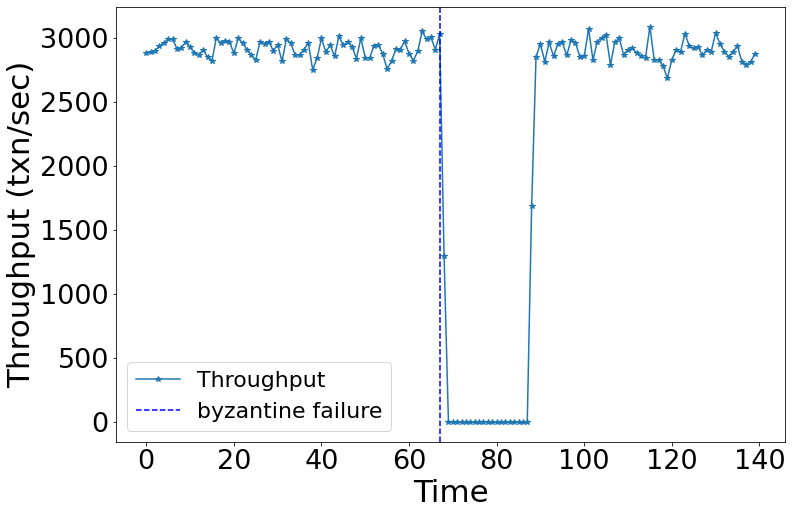

<Figure size 432x288 with 0 Axes>

In [67]:

from itertools import cycle
cycol = cycle('bgrcmk')


fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
pl.plot(s1,s2, '-*', label = 'Throughput')

pl.axvline(x = 67, color = next(cycol), linestyle='--', label = 'byzantine failure')
# pl.axvline(x = 82, color = next(cycol), linestyle='--', label = 'failure: Node-8')
# pl.axvline(x = 93, color = next(cycol), linestyle='--', label = 'failure: Node-9')
# pl.axvline(x = 104, color = next(cycol), linestyle='--', label = 'failure: Node-17')
# pl.axvline(x = 115, color = next(cycol), linestyle='--', label = 'failure: Node-18')
# pl.axvline(x = 126, color = next(cycol), linestyle='--', label = 'failure: Node-19')

pl.legend()
pl.xlabel('Time')
pl.ylabel('Throughput (txn/sec)')
# pl.title('HotStuff Multicluster: Throughput in Optimized Vs Non-Optimized Clusters')

# pl.ylim(0,50)
pl.savefig(experiment+'/rvc.png', dpi =150, bbox_inches = 0 )
pl.show()
pl.clf()

(0.0, 0.6)

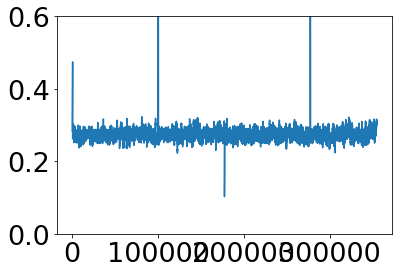

In [64]:
pl.plot(lats)
pl.ylim(0,0.6)

In [58]:
np.savetxt(experiment + '/throughput_data.txt',np.array([s1,s2]))

In [59]:
np.savetxt?

In [60]:
2700*70

189000